# Apache Impala for IPython/Jupyter Notebooks, using impyla package
***

## 1. Connect to the target database (requires Cloudera impyla package)

In [1]:
from impala.dbapi import connect
conn = connect(host='impalasrv-test', port=21050)

## 2. Run a query and fetch the results

In [2]:
cur = conn.cursor()

cur.execute('select * from test2.emp limit 2')

cur.fetchall()

[(7876,
  'ADAMS',
  'CLERK',
  7788,
  datetime.datetime(1987, 5, 23, 0, 0),
  1100,
  None,
  20),
 (7499,
  'ALLEN',
  'SALESMAN',
  7698,
  datetime.datetime(1981, 2, 20, 0, 0),
  1600,
  300,
  30)]

## Integration with pandas

In [3]:
cur = conn.cursor()

cur.execute('select * from test2.emp')

from impala.util import as_pandas
df = as_pandas(cur)

df.head()

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
1,7900,JAMES,CLERK,7698.0,1981-12-03,950,NaN,30
2,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20
3,7782,CLARK,MANAGER,7839.0,1981-06-09,2450,NaN,10
4,7902,FORD,ANALYST,7566.0,1981-12-03,3000,NaN,20


## More examples of integration with IPython ecosystem

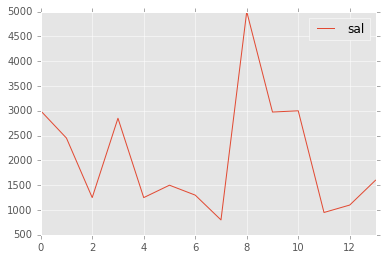

In [4]:
cur = conn.cursor()
cur.execute('select ename, sal from test2.emp')
df = as_pandas(cur)

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

df.plot()